In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import cross_val_score

In [2]:
# load our data
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data',
                header = None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


### the coulmns names
- age
- sex
- cp, chest pain
- restbp, resting blood pressure (in mm hg)
- chol, serum cholesterol in mg/dl
- fbs, fasting blood sugar
- restecg, resting electrocardiographic results
- thalach, maximum heart rate achieved
- exang, exercise induced angina
- oldpeak, ST depression induced by exercise relative to rest
- slope, the slope of the peak exercise ST segment.
- ca, number of major vessels (0-3) colored by fluoroscopy
- thal, this is short of thalium heart scan.
- hd, diagnosis of heart disease, the predicted attribute

In [4]:
# change the columns to column names
df.columns = ['age',
             'sex',
             'cp',
             'restbp',
             'chol',
             'fbs',
             'restecg',
             'thalach',
             'exang',
             'oldpeak',
             'slope',
             'ca',
             'thal',
             'hd']

In [5]:
df.head(2)

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2


# Identify and dealing with missing data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    float64
 1   sex      303 non-null    float64
 2   cp       303 non-null    float64
 3   restbp   303 non-null    float64
 4   chol     303 non-null    float64
 5   fbs      303 non-null    float64
 6   restecg  303 non-null    float64
 7   thalach  303 non-null    float64
 8   exang    303 non-null    float64
 9   oldpeak  303 non-null    float64
 10  slope    303 non-null    float64
 11  ca       303 non-null    object 
 12  thal     303 non-null    object 
 13  hd       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [7]:
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [8]:
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

there missing data in those 2 columns they have '?' 
and we will have to deal with them

In [9]:
# we will know how many rows have '?' values
len(df.loc[(df['ca'] == '?') | (df['thal'] == '?')])

6

In [10]:
df.loc[(df['ca'] == '?') | (df['thal'] == '?')]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [11]:
df.shape

(303, 14)

In [12]:
df_no_missing = df.loc[(df['ca'] != '?') & (df['thal'] != '?')]

In [13]:
df_no_missing = df_no_missing.reset_index(drop=True)

# Split the data

In [14]:
X = df_no_missing.drop('hd', axis = 1).copy()
X.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [15]:
y = df_no_missing['hd'].copy()
y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

In [16]:
X.shape

(297, 13)

### Encoding the cat columns

In [17]:
cat_col = ['cp', 'restecg', 'slope', 'thal']

In [18]:
encoder = OneHotEncoder(handle_unknown='ignore')
encoded_columns = encoder.fit_transform(X[cat_col]).toarray()
encoded_X = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(cat_col))
X = X.drop(cat_col, axis=1)
X = X.join(encoded_X)

In [19]:
X.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [20]:
y.unique()

array([0, 2, 1, 3, 4])

In [21]:
y_not_zero_index = y > 0
y[y_not_zero_index] = 1
y.unique()

array([0, 1])

# Build the classification tree

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [23]:
dec_classifier = DecisionTreeClassifier(random_state = 42)
dec_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

[Text(0.6005208333333333, 0.9545454545454546, 'ca <= 0.5\ngini = 0.499\nsamples = 237\nvalue = [124, 113]\nclass = No HD'),
 Text(0.3885416666666667, 0.8636363636363636, 'thal_7.0 <= 0.5\ngini = 0.384\nsamples = 139\nvalue = [103, 36]\nclass = No HD'),
 Text(0.24791666666666667, 0.7727272727272727, 'oldpeak <= 2.7\ngini = 0.243\nsamples = 99\nvalue = [85, 14]\nclass = No HD'),
 Text(0.1625, 0.6818181818181818, 'age <= 57.5\ngini = 0.192\nsamples = 93\nvalue = [83, 10]\nclass = No HD'),
 Text(0.08333333333333333, 0.5909090909090909, 'chol <= 311.5\ngini = 0.062\nsamples = 62\nvalue = [60, 2]\nclass = No HD'),
 Text(0.05, 0.5, 'restbp <= 109.0\ngini = 0.033\nsamples = 60\nvalue = [59, 1]\nclass = No HD'),
 Text(0.03333333333333333, 0.4090909090909091, 'sex <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]\nclass = No HD'),
 Text(0.016666666666666666, 0.3181818181818182, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = No HD'),
 Text(0.05, 0.3181818181818182, 'exang <= 0.5\ngini = 0.5\nsa

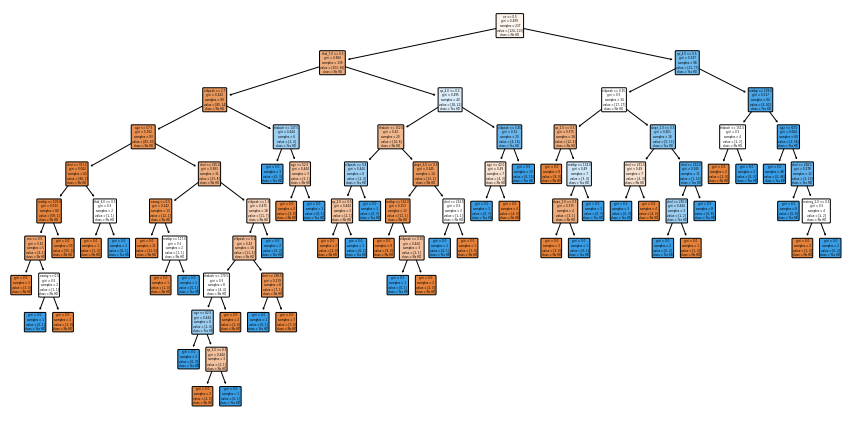

In [24]:
plt.figure(figsize = (15, 7.5))
plot_tree(dec_classifier,
         filled = True,
         rounded = True, 
         class_names = ["No HD", "Yes HD"],
         feature_names = X.columns)

/Users/mu7annad.0gmail.com/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


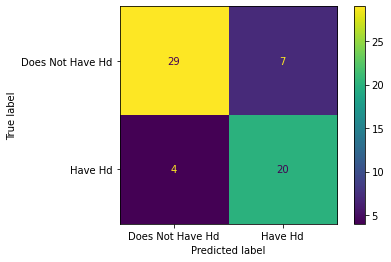

In [25]:
plot_confusion_matrix(dec_classifier, X_test, y_test, display_labels=["Does Not Have Hd", "Have Hd"])

# Cost complexity pruning

Cost complexity pruning is a technique used to reduce the size of a decision tree by avoiding overfitting, which occurs when a model is too complex and fits the training data too closely. In cost complexity pruning, a penalty term is added to the complexity of the model, and the decision tree is grown until this total cost is minimized. This leads to a simpler tree that may generalize better to new data. The penalty term, also known as the regularization parameter, controls the trade-off between model complexity and fit to the training data.

In [26]:
# determine values for alpha
path = dec_classifier.cost_complexity_pruning_path(X_train, y_train)  
# extract diff values for alpha
ccp_alphas = path.ccp_alphas
# exlude the maximum value for alpha
ccp_alphas = ccp_alphas[:-1]

In [27]:
# create an array to put decision trees on it
clf_dts = []

# now create one decision tree per value for alpha and store it in the array
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state = 0, ccp_alpha = ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

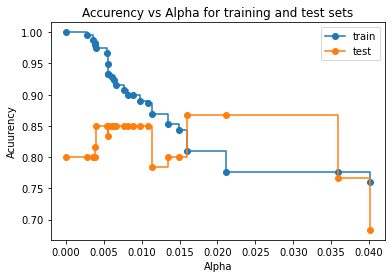

In [28]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel("Alpha")
ax.set_ylabel("Acuurency")
ax.set_title("Accurency vs Alpha for training and test sets")
ax.plot(ccp_alphas, train_scores, marker = 'o', label = 'train', drawstyle = "steps-post")
ax.plot(ccp_alphas, test_scores, marker = 'o', label = 'test', drawstyle = "steps-post")
ax.legend()
plt.show()

In the graph above, we see that the accuracy for the Testing Dataset hits its maximum value when alpha is about 0.016. After this value for alpha
the accuracy of the Training Dataset drops off and that suggests we should set cp alpha=0.016.

<AxesSubplot:xlabel='Tree'>

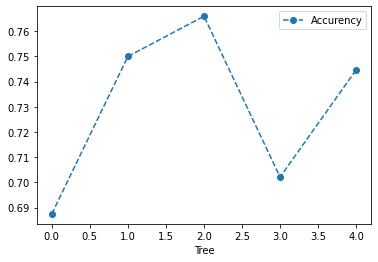

In [29]:
clf_dt = DecisionTreeClassifier(random_state = 42, ccp_alpha = 0.016)

## now use 5-fold cross validation create 5 different training and testing datasets that
## are then used to train and test the tree.
## NOTE: We use 5-fold because we don't have tons of data,
scores = cross_val_score(clf_dt, X_train, y_train, cv = 5)
df = pd.DataFrame(data = {'Tree': range(5), 'Accurency': scores})

df.plot(x = 'Tree', y = 'Accurency', marker = 'o', linestyle = '--')

The graph above shows that using different Training and Testing data with the same alpha resulted in different accuracies, suggesting that alpha is
sensitive to the datasets. So, instead of picking a single Training dataset and single Testing dataset, let's use cross validation to find the optimal value
for cc alpha

(array([-0.005,  0.   ,  0.005,  0.01 ,  0.015,  0.02 ,  0.025,  0.03 ,
         0.035,  0.04 ,  0.045]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

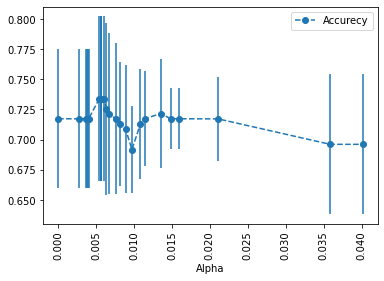

In [30]:
# create an arrat to store the results of each fold during cv
alpha_values = []

# now create one decision tree per value for alpha and store it in the array
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state = 0, ccp_alpha = ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv = 5)
    alpha_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
    
alpha_results = pd.DataFrame(alpha_values, columns = ['Alpha', 'Accurecy', 'Std'])

alpha_results.plot(x = 'Alpha', y = 'Accurecy', yerr = 'Std', marker = 'o', linestyle = '--')
plt.xticks(rotation=90)

In [31]:
our_alpha = alpha_results[(alpha_results['Alpha'] > 0.006) & (alpha_results['Alpha'] < 0.0063)]['Alpha']
our_alpha = float(our_alpha)
our_alpha

0.006065400843881857

In [32]:
clf_dt_pruend = DecisionTreeClassifier(random_state = 42 , ccp_alpha = our_alpha)
clf_dt_pruend.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.006065400843881857, random_state=42)

/Users/mu7annad.0gmail.com/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


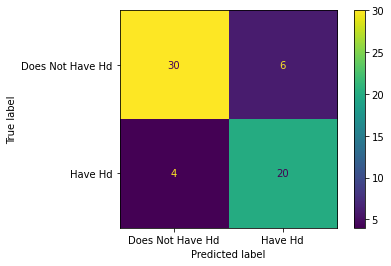

In [33]:
plot_confusion_matrix(clf_dt_pruend, X_test, y_test, display_labels=["Does Not Have Hd", "Have Hd"])

[Text(0.49074074074074076, 0.9285714285714286, 'ca <= 0.5\ngini = 0.499\nsamples = 237\nvalue = [124, 113]\nclass = No HD'),
 Text(0.2037037037037037, 0.7857142857142857, 'thal_7.0 <= 0.5\ngini = 0.384\nsamples = 139\nvalue = [103, 36]\nclass = No HD'),
 Text(0.1111111111111111, 0.6428571428571429, 'oldpeak <= 2.7\ngini = 0.243\nsamples = 99\nvalue = [85, 14]\nclass = No HD'),
 Text(0.07407407407407407, 0.5, 'age <= 57.5\ngini = 0.192\nsamples = 93\nvalue = [83, 10]\nclass = No HD'),
 Text(0.037037037037037035, 0.35714285714285715, 'gini = 0.062\nsamples = 62\nvalue = [60, 2]\nclass = No HD'),
 Text(0.1111111111111111, 0.35714285714285715, 'chol <= 235.0\ngini = 0.383\nsamples = 31\nvalue = [23, 8]\nclass = No HD'),
 Text(0.07407407407407407, 0.21428571428571427, 'gini = 0.142\nsamples = 13\nvalue = [12, 1]\nclass = No HD'),
 Text(0.14814814814814814, 0.21428571428571427, 'oldpeak <= 1.3\ngini = 0.475\nsamples = 18\nvalue = [11, 7]\nclass = No HD'),
 Text(0.1111111111111111, 0.07142857

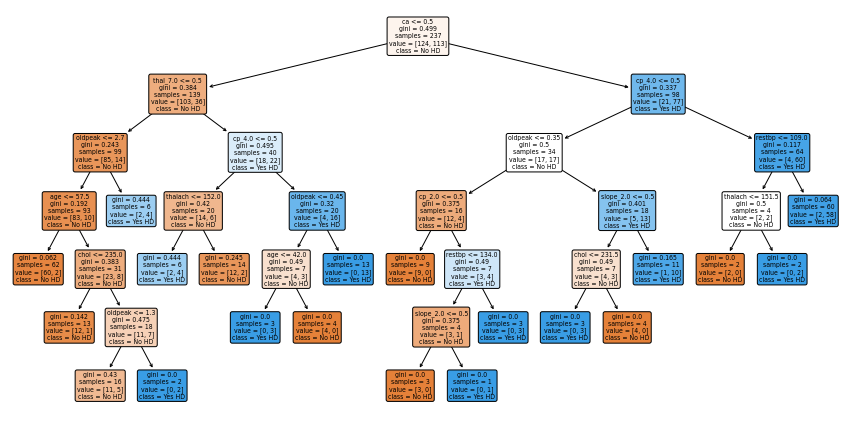

In [34]:
plt.figure(figsize = (15, 7.5))
plot_tree(clf_dt_pruend,
         filled = True,
         rounded = True, 
         class_names = ["No HD", "Yes HD"],
         feature_names = X.columns)